# Predicción del precio de los Toyota Corolla (por modelo de regresión)

### Objetivo

Un gran concesionario de automóviles Toyota ofrece a los compradores de automóviles Toyota nuevos la opción de comprar su automóvil usado como parte de un intercambio. En particular, una nueva promoción promete pagar altos precios por los automóviles Toyota Corolla usados ​​para los compradores de un automóvil nuevo. Luego, el concesionario vende los autos usados ​​por una pequeña ganancia. Para garantizar una ganancia razonable, el concesionario debe poder predecir el precio que obtendrá el concesionario por los autos usados. Por esa razón, se recopilaron datos sobre todas las ventas anteriores de Toyota Corollas usados ​​en el concesionario. Los datos incluyen el precio de venta y otra información sobre el automóvil, como su antigüedad, kilometraje, tipo de combustible y tamaño del motor.

### Pasos a seguir:

1) ** EDA **
     Clasificación de los datos y verificación de los valores atípicos a través del proceso de exploración, verificación de las relaciones entre las variables (diagrama de dispersión, mapa de calor, etc.)

2) ** Selección de funciones **
    Selección de variables para crear un modelo de regresión mediante ANOVA, OLS.

3) ** Modelado **
     Mejorar el modelo a través de procesos como multicolinealidad entre variables seleccionadas, escalado de variables, transformación de variables y eliminación de valores atípicos.

4) ** Validación cruzada **
     Pruebar el modelo de regresión separando los datos de train y test(usando RMSE)

# Importar Paquetes y Librerías.

In [1]:
import numpy as np
import pandas as pd



import statsmodels.stats.api as sms
import statsmodels.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns; sns.set(style = 'darkgrid',context = "paper", color_codes = True)
from patsy import dmatrix

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


from PIL import Image
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold

from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")







# Imagen de Referencia.

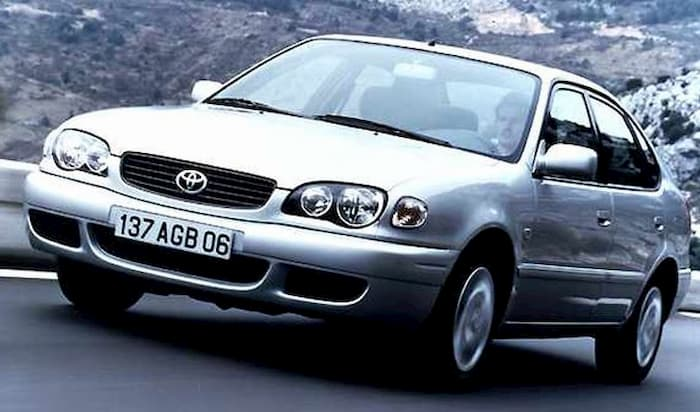

In [2]:
im = Image.open('imagen/Corolla-2000-1.jpg')
size = (750, 750)
im.thumbnail(size)
im

# EDA (Exploratory Data Analysis)

In [3]:
df= pd.read_csv('Data/train.csv')

In [4]:
df.head(960)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1352,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,8250,77,4,1998,61648,Petrol,110,1,...,0,1,0,0,1,1,0,0,0,1
956,1353,TOYOTA Corolla 1.3 16V Linea Terra Liftb 4/5-D...,7950,75,6,1998,61626,Petrol,86,0,...,0,1,0,0,0,0,0,0,0,0
957,1355,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4...,9000,79,2,1998,61165,Petrol,107,1,...,0,1,0,0,1,1,0,0,0,0
958,1356,TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-D...,7150,70,11,1998,61000,Petrol,110,1,...,1,1,0,0,0,0,0,0,0,1


In [5]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [6]:
df.shape

(1019, 39)

In [7]:
df.isnull().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
df = pd.DataFrame(df)
df.tail(n=3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [10]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.0,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,724.867517,10738.358194,56.041217,5.480864,1999.623160,68177.927380,101.479882,0.669284,0.056919,1579.582924,4.044161,4.0,5.028459,86.405299,1072.262022,0.403337,0.887144,3.810599,0.813543,0.969578,0.717370,0.504416,0.059863,0.283611,0.226693,0.585868,0.567223,0.974485,0.142296,0.261040,0.312071,0.771344,0.196271,0.142296,0.002944,0.278705
std,415.043138,3614.987568,18.615283,3.304515,1.548589,37966.031948,14.811333,0.470702,0.231801,488.566949,0.954265,0.0,0.166363,39.276282,51.356826,0.490808,0.316572,2.925809,0.389667,0.171830,0.450499,0.500226,0.237349,0.450972,0.418898,0.492813,0.495704,0.157761,0.349525,0.439417,0.463566,0.420173,0.397371,0.349525,0.054206,0.448582
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,4.0,5.000000,19.000000,1000.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,363.000000,8400.000000,44.000000,3.000000,1998.000000,41567.500000,86.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1040.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,732.000000,9850.000000,61.000000,5.000000,1999.000000,62280.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,4.0,5.000000,85.000000,1070.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.500000,11950.000000,70.000000,8.000000,2001.000000,86467.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1085.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,31000.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,4.0,6.000000,283.000000,1615.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observaciones

* El atributo “CC” presenta un outlier notorio superior a 16000, este valor esta fuera del contexto de un vehiculo toyota corolla, donde los valores promedio rondan el 100.
* El atributo Fuel_Type es de tipo char, requerira un proceso de encoding.
* El valor de Cylinder es constante.
* El atributo “Age_08_04” presenta valores outliers correspondientes a vehiculos nuevos cuya antiguedad es 0.
* El atributo “HP” presenta un valor outlier superior a 180. Según una investigacion realizada en medios externos al dataset, el valor si corresponde a un modelo de Toyota Corolla.
* El atributo “KM” presenta valores outliers. Destaco sobretodo un conjunto de valores superiores a los 200000.
* El atributo “Quarterly_Tax” presenta outliers para valores superiores a 150 y valores menores a 50, sobre una mediana de 70 aproximadamente.
* El atributo “Weight” presenta outliers para valores superiores a 1150 sobre una mediana de 1050 aproximadamente.


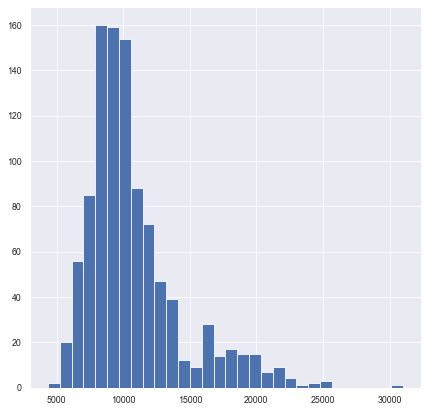

In [11]:

df['Price'].hist(bins=30, figsize=(7,7))
plt.show()


# Datos de precios sesgados hacia la izquierda.

In [12]:
df.describe().loc[['min','max','mean']].T

,min,max,mean
Id,1.0,1442.0,724.867517
Price,4350.0,31000.0,10738.358194
Age_08_04,1.0,80.0,56.041217
Mfg_Month,1.0,12.0,5.480864
Mfg_Year,1998.0,2004.0,1999.623160
KM,1.0,243000.0,68177.927380
HP,69.0,192.0,101.479882
Met_Color,0.0,1.0,0.669284
Automatic,0.0,1.0,0.056919
CC,1300.0,16000.0,1579.582924


In [13]:
# Precio de los vehículos por modelo

df.groupby(['Model', 'Price']).count()



,,Id,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Model,Price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TOYOTA Corolla,9390,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors,9940,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors,15950,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TOYOTA Corolla 1.3 16V 2/3-Doors,8900,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors,6750,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOYOTA Corolla Linea Luna 1.6i 16V 2/3-Doors,8950,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TOYOTA Corolla Luna 5drs D4D116 PK 4/5-Doors,23000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TOYOTA Corolla Sw 20D Linea Terra Stationwagen,8950,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
# Cantidad de modelos de vehículos por precio

price_model = df.groupby('Price').count()['Model']

price_model



Price
4350     1
4450     1
5250     2
5600     1
5740     1
        ..
23950    1
24500    1
24950    2
24990    1
31000    1
Name: Model, Length: 197, dtype: int64

In [15]:
price_model.mean()

5.1725888324873095

In [16]:
# Cantidad de vehículos por año

df.groupby("Mfg_Year").count()['Id']

print ("The range of the model is between ", df['Mfg_Year'].min(), " ~ ", df['Mfg_Year'].max())

The range of the model is between  1998  ~  2004


In [17]:
# Número de vehículos por año y combustible.


df.groupby(['Mfg_Year', 'Fuel_Type']).count()['Id']

Mfg_Year  Fuel_Type
1998      CNG            1
          Diesel        26
          Petrol       253
1999      CNG            2
          Diesel        27
          Petrol       287
2000      CNG            3
          Diesel        20
          Petrol       132
2001      CNG            3
          Diesel        15
          Petrol       116
2002      Diesel         6
          Petrol        53
2003      Diesel         6
          Petrol        54
2004      Diesel         6
          Petrol         9
Name: Id, dtype: int64

In [18]:
# Agrupando por número de vehículos por año , combustible, CC y HP.

df.groupby(['Mfg_Year', 'Fuel_Type', 'CC','HP']).count()

Id  Model  Price  Age_08_04  Mfg_Month   KM  \
Mfg_Year Fuel_Type CC    HP                                                  
1998     CNG       1600  110    1      1      1          1          1    1   
         Diesel    2000  72    23     23     23         23         23   23   
                         73     1      1      1          1          1    1   
                         90     2      2      2          2          2    2   
         Petrol    1300  86    77     77     77         77         77   77   
                   1587  110    1      1      1          1          1    1   
                   1600  107    9      9      9          9          9    9   
                         110  166    166    166        166        166  166   
1999     CNG       1600  110    2      2      2          2          2    2   
         Diesel    2000  72    24     24     24         24         24   24   
                         90     2      2      2          2          2    2   
                         116    1      1      1          1          1    1   
         Petrol    1300  86    94     94     94         94         94   94   
                   1332  86     1      1      1          1          1    1   
                   1587  110    1      1      1          1          1    1   
                   1600  107    7      7      7          7          7    7   
                         110  184    184    184        184        184  184   
2000     CNG       1600  110    3      3      3          3          3    3   
         Diesel    1800  69     1      1      1          1          1    1   
                   1900  69    12     12     12         12         12   12   
                   2000  69     1      1      1          1          1    1   
                         72     6      6      6          6          6    6   
         Petrol    1300  86     5      5      5          5          5    5   
                         97     1      1      1          1          1    1   
                   1398  97     1      1      1          1          1    1   
                   1400  97    44     44     44         44         44   44   
                   1600  110   81     81     81         81         81   81   
2001     CNG       1600  110    3      3      3          3          3    3   
         Diesel    1800  69     1      1      1          1          1    1   
                   1900  69    10     10     10         10         10   10   
                   2000  90     4      4      4          4          4    4   
         Petrol    1400  97    28     28     28         28         28   28   
                   1600  110   87     87     87         87         87   87   
                         116    1      1      1          1          1    1   
2002     Diesel    2000  90     6      6      6          6          6    6   
         Petrol    1400  97    19     19     19         19         19   19   
                   1598  110    1      1      1          1          1    1   
                   1600  110   26     26     26         26         26   26   
                   1800  192    6      6      6          6          6    6   
                   16000 110    1      1      1          1          1    1   
2003     Diesel    1995  90     1      1      1          1          1    1   
                   2000  90     4      4      4          4          4    4   
                         116    1      1      1          1          1    1   
         Petrol    1400  97    20     20     20         20         20   20   
                         98     1      1      1          1          1    1   
                   1598  110    1      1      1          1          1    1   
                   1600  110   31     31     31         31         31   31   
                   1800  192    1      1      1          1          1    1   
2004     Diesel    2000  90     2      2      2          2          2    2   
                         116    4      4      4      

#### Eliminando valores atípicos

In [19]:
df['CC'].value_counts()

1600     608
1300     177
1400     114
2000      81
1900      22
1800       9
1598       2
1587       2
16000      1
1995       1
1398       1
1332       1
Name: CC, dtype: int64

In [20]:
# 'CC' data Redondear a decimal
## No quería descartar los datos solo por los valores de 'CC' incorrectos.
### He reemplazado los valores por los valores cerrados de 'CC' en términos de unidades de centenas




df["CC"].replace([16000], 1600, inplace=True)


new_cc =[]
for item in list(df['CC']):
    if item % 100 == 0:
        new_cc.append(item)
    
    elif item % 100 > 50:
        revised_item = item + 100 - (item % 100)
        new_cc.append(revised_item)
    
    elif 0 < item % 100 < 50:
        revised_item_2 = item - (item % 100)
        new_cc.append(revised_item_2)

df["CC"] = pd.DataFrame(new_cc)

In [21]:
df["CC"]

0       2000
1       2000
2       2000
3       1800
4       1800
        ... 
1014    1300
1015    1300
1016    1300
1017    1300
1018    1600
Name: CC, Length: 1019, dtype: int64

In [22]:
# Exploración para categorizar las variables HP

list(set(df['HP']))
len(list(df['HP']))

1019

In [23]:
# Corolla Model

new_hp_1 = []
for item in list(df['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_1.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_1.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_1.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_1.append(item)
    elif item > 190:
        item = 190
        new_hp_1.append(item)
        
df["HP"] = pd.DataFrame(new_hp_1)

df["HP"].tail(n=10)

1009     90
1010    110
1011     90
1012     90
1013     90
1014     90
1015     90
1016     90
1017     90
1018    110
Name: HP, dtype: int64

## Clasificación de datos

In [24]:
# Ordinales y Numericas.

real_var = ['Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']

In [25]:
# Categoricas


cat_var = ["Mfg_Year", "HP", "CC", "Fuel_Type", "Doors", 'Gears', "Color", "Met_Color", "Automatic", "Mfr_Guarantee",\
           "BOVAG_Guarantee", "ABS", "Airbag_1", "Airbag_2", "Airco",\
          "Automatic_airco", "Boardcomputer", "CD_Player", "Central_Lock",\
          "Powered_Windows", "Power_Steering", "Radio", "Mistlamps",\
          "Sport_Model", "Backseat_Divider", "Metallic_Rim", "Radio_cassette",\
          "Parking_Assistant","Tow_Bar"]

In [26]:
#  Dado que la variable dependiente Precio, también es un dato numérico continuo, 
# la relación con otras variables continuas se verifica y analiza mediante un diagrama de pares.

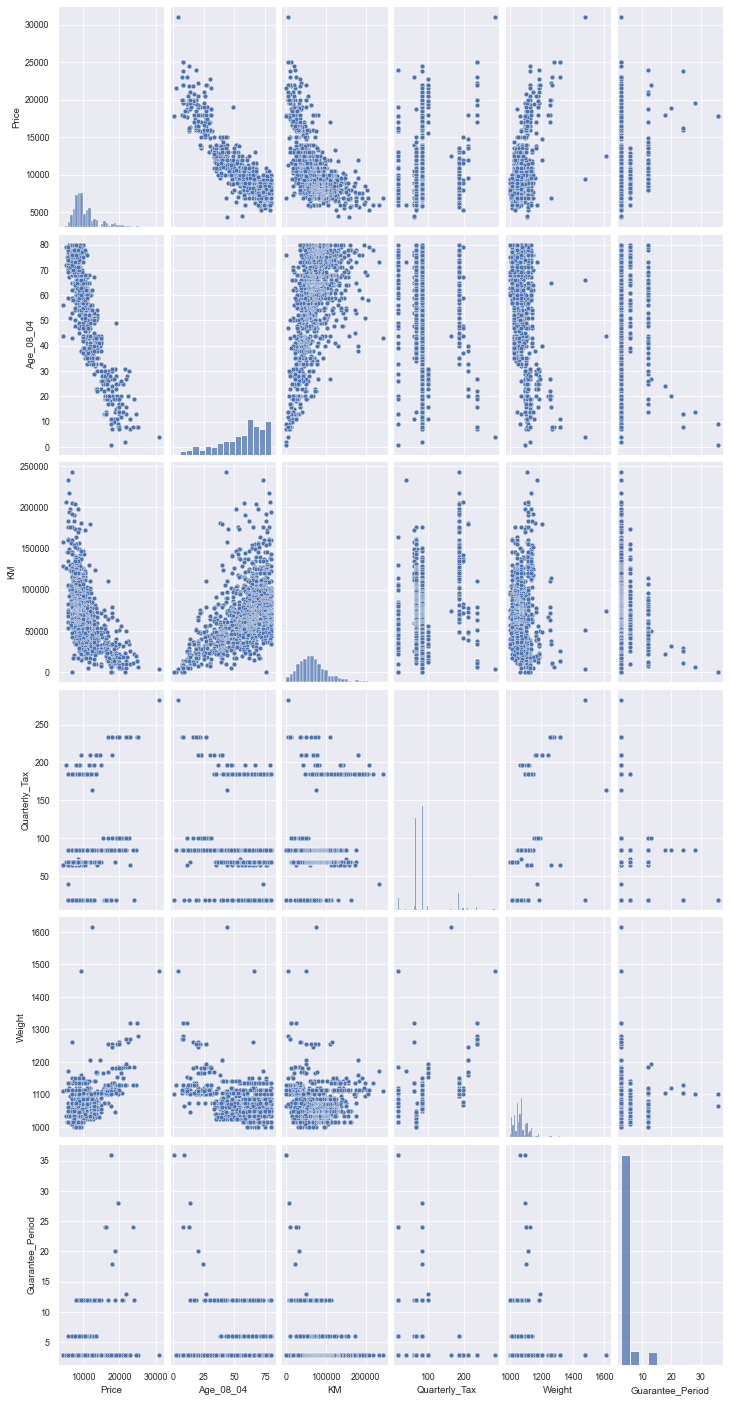

In [27]:
real_var_and_price = ['Price','Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']

sns.pairplot(df[real_var_and_price]).fig.set_size_inches(10,20)

plt.show()

* 1.- 'Age_08_04' y 'KM' parecen estar fuertemente relacionados con nuestro objetivo, Precio. (Sin embargo, la relación de 'KM' no es tan lineal como 'Age_08_04')


* 2.- Aunque 'CC' y 'HP' son valores reales continuos, es más probable que se comporten como un valor categórico en este caso.


* 3.- 'Mfg_Year' y 'Age_08_04' parecen tener una correlación significativa entre sí, lo que indica que esos dos valores pueden traer un problema de 'Multicolinealidad' cuando incluimos ambos en el modelo de predicción

#### Coeficiente de correlación entre las variables exploradas anteriormente y analisis  de la correlación visualizándola con un mapa de calor.

In [28]:
# real variable

corr_table = pd.concat([df["Price"], df[real_var]], axis=1)

corr_mat = corr_table.corr()


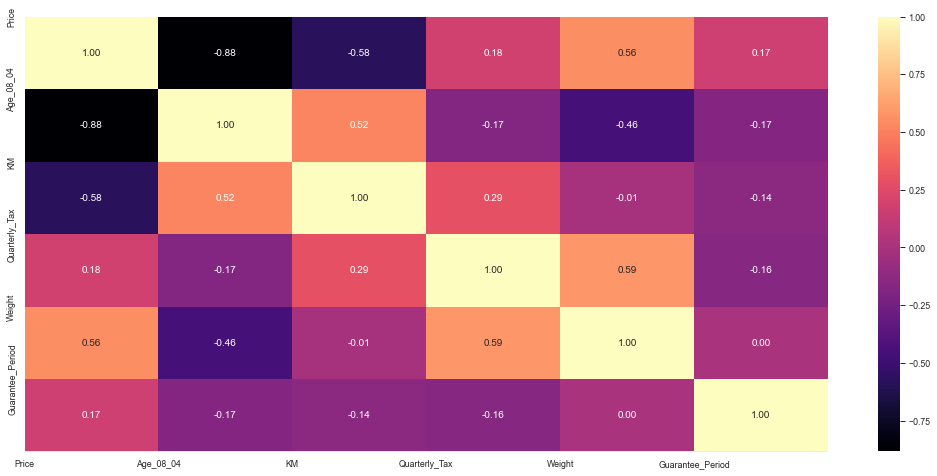

In [29]:
# heatmap

f, ax = plt.subplots(figsize=(18, 8))

sns.heatmap(corr_mat, cmap='magma', annot=True, fmt=".2f")

plt.xticks(range(len(corr_mat.columns)), corr_mat.columns);

plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)

plt.show()


 Age_08_04, KM, Weight con un coeficiente de correlación de 0.5 o más fueron seleccionadas como variables relativamente importantes

Es necesario comprobar más adelante la multicolinealidad entre las variables seleccionadas anteriormente

## Error Bar Plot

Visualización del precio promedio para cada categoría de las variables clasificadas como variables de categoría con un gráfico de barras de error para verificar si se nota una diferencia significativa.

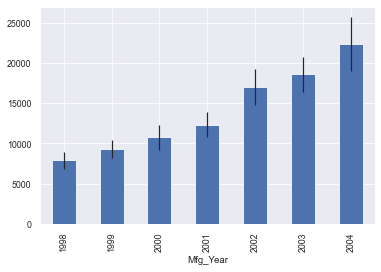

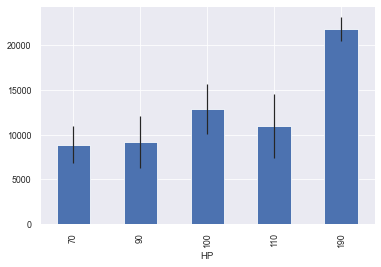

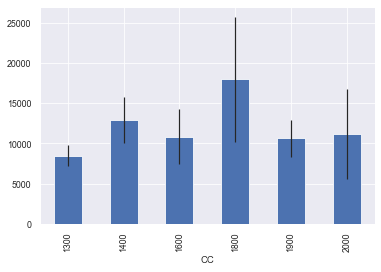

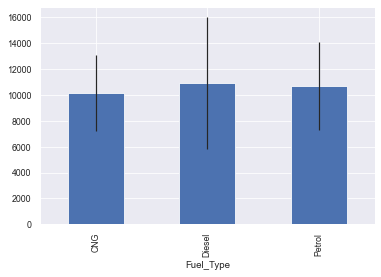

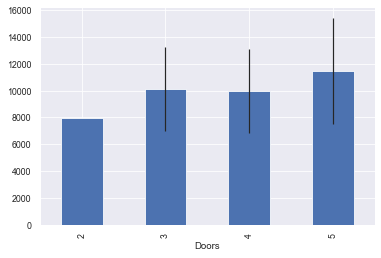

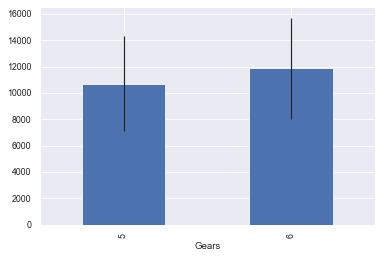

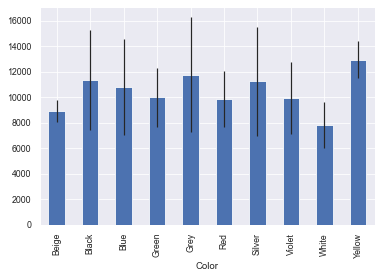

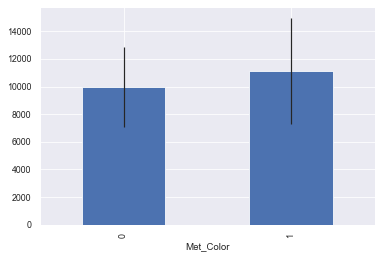

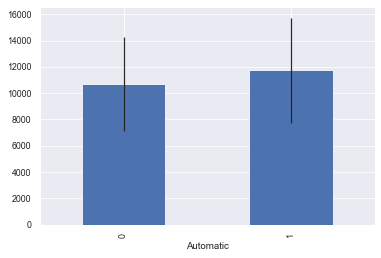

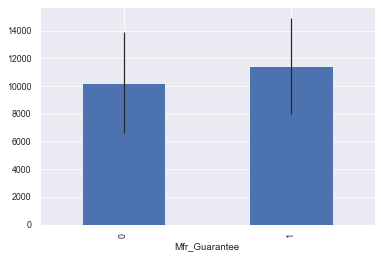

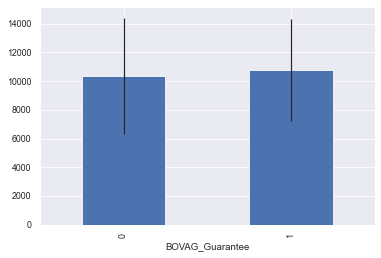

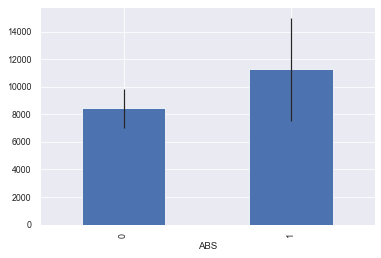

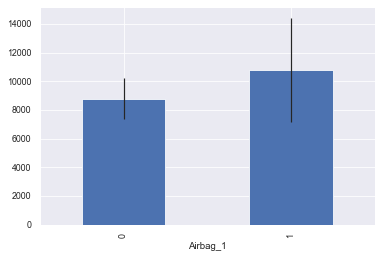

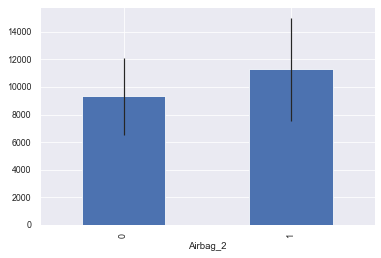

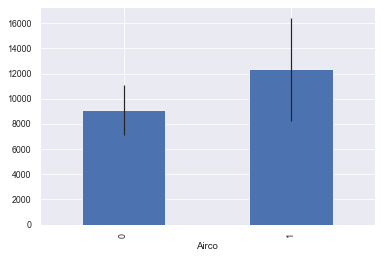

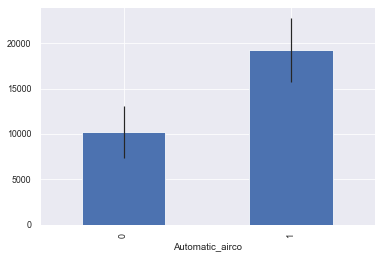

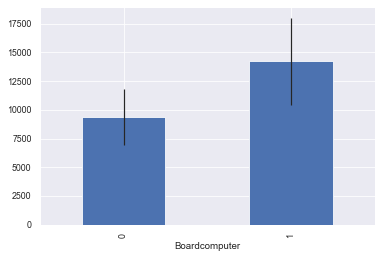

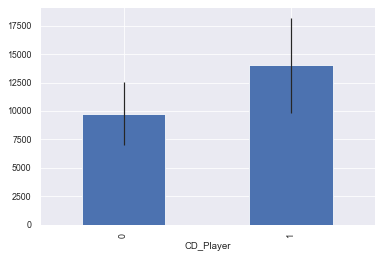

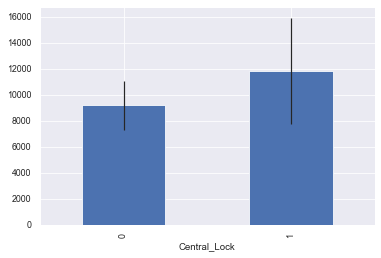

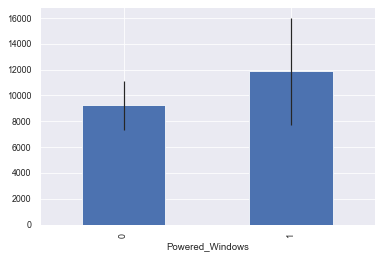

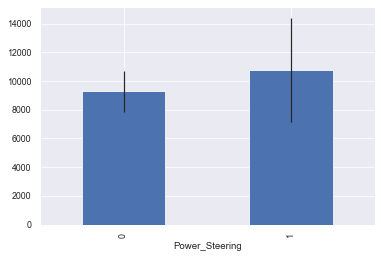

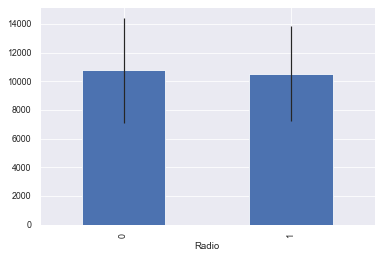

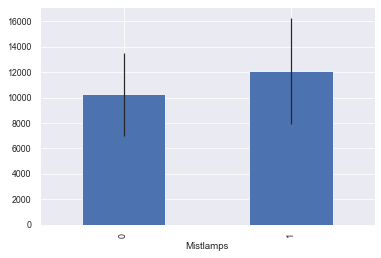

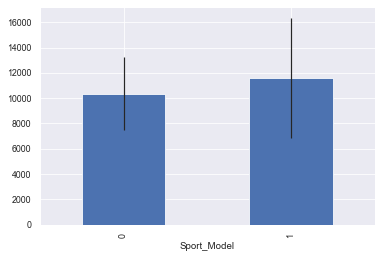

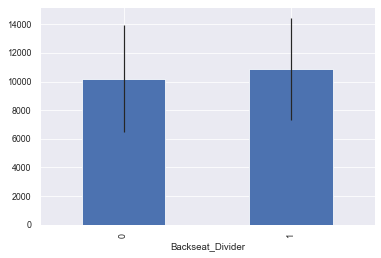

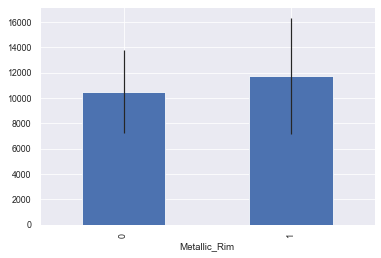

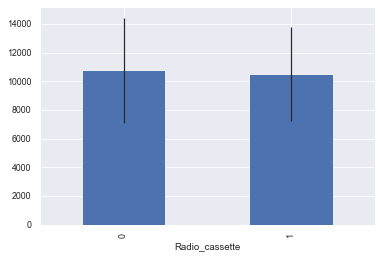

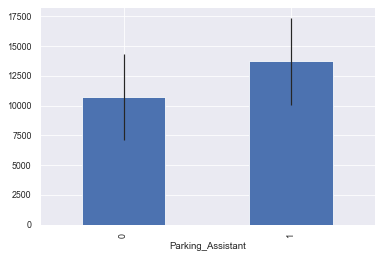

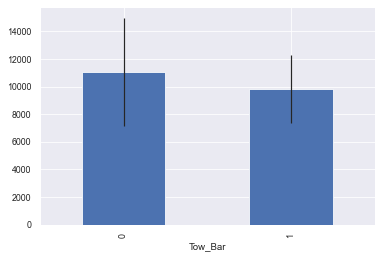

In [30]:
def errorbar_plot(var):

    model = df.groupby([var])['Price']
    means = model.mean()
    errors = model.std()
    fig, ax = plt.subplots()   
    return means.plot(yerr=errors, y = 'Price', kind='bar')

for item in cat_var:
    errorbar_plot(item)

plt.show()

El resultado de la gráfica de error se usa para verificar principalmente si existe una diferencia significativa en el precio de cada variable por categoría en una situación donde no hay control de variable.

> 1) En el caso de HP; 190 caballos de fuerza muestran una diferencia significativa.

> 2) En el caso de CC (volumen de desplazamiento), solo 1300 cc o menos tenían un valor significativamente menor en comparación con otras categorías. Se planteó la hipótesis de que cuanto mayor era el desplazamiento, mayor era el precio que no era claramente visible.

> 3) Es difícil concluir que la diferencia de precio por tipo de combustible tampoco sea significativa.

> 4) La mayoría de las variables no mostraron una diferencia significativa, y " ABS, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows " se identificaron como variables que podrían causar una diferencia de precio.

### Con los resultados hasta este punto, probé el primer análisis de regresión (usando los mínimos cuadrados ordinarios MCO) y encontré que los p value de las variables de categoría consideradas importantes eran altos. 

In [31]:
# Analice la desviación promedio y estándar de los precios vs año, combustible, desplazamiento y caballos de fuerza como índices.

In [32]:
pd.set_option('display.max_rows', 500)
df.groupby(['Mfg_Year', 'Fuel_Type', 'CC','HP']).aggregate((np.mean, np.std))['Price']

mean          std
Mfg_Year Fuel_Type CC   HP                            
1998     CNG       1600 110   5250.000000          NaN
         Diesel    2000 70    7697.916667  1245.904523
                        90    8725.000000  1096.015511
         Petrol    1300 90    7680.129870  1010.674922
                   1600 110   8049.539773   976.026094
1999     CNG       1600 110   8450.000000   707.106781
         Diesel    2000 70    8733.333333  1436.153276
                        90    6600.000000   494.974747
                        110   8950.000000          NaN
         Petrol    1300 90    8923.157895  1035.811701
                   1600 110   9641.875000   925.857958
2000     CNG       1600 110   9750.000000  1561.249500
         Diesel    1800 70    4450.000000          NaN
                   1900 70    9366.250000  1644.145433
                   2000 70    9107.142857  1288.225062
         Petrol    1300 90   11060.000000   886.284379
                        100  11750.000000          NaN
                   1400 100  10447.200000   839.499624
                   1600 110  11421.975309  1446.259114
2001     CNG       1600 110  13283.333333  1527.525232
         Diesel    1800 70    4350.000000          NaN
                   1900 70   12145.000000  2110.746314
                   2000 90   12425.000000  2261.452336
         Petrol    1400 100  11627.857143  1158.869523
                   1600 110  12647.386364  1151.061973
2002     Diesel    2000 90   15641.666667  2196.000152
         Petrol    1400 100  15492.105263  1114.832219
                   1600 110  17338.892857  1478.078040
                   1800 190  21458.333333  1087.849561
2003     Diesel    2000 90   19870.000000  1561.089363
                        110  23000.000000          NaN
         Petrol    1400 100  16799.761905   840.238770
                   1600 110  19268.437500  1909.392927
                   1800 190  23950.000000          NaN
2004     Diesel    2000 90   23470.000000  2149.604615
                        110  25962.500000  3488.164513
         Petrol    1400 100  18647.500000  1205.617062
                   1600 110  20992.857143  1889.979844

#### Reasigne los datos de HP en 3 grupos:  100 o menos, 110, 190 caballos de fuerza 

##### Crear columna "New_HP"

In [33]:
new_hp_df =[]
for item in df['HP']:
    if item <= 100:
        item = 100
        new_hp_df.append(item)
    else:
        new_hp_df.append(item)
        
new_hp = pd.DataFrame(new_hp_df)
df['New_HP'] = new_hp

df.tail(n=1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,110


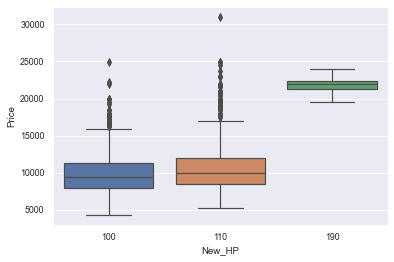

In [34]:
sns.boxplot(df['New_HP'], df['Price'])
plt.show()

## ¿El combustible realmente tiene un impacto insignificante en el precio? 

#### Para confirmar esto, seleccione el año del modelo que se espera que tenga el mayor impacto y verifique el valor promedio del precio por tipo de combustible.

In [35]:
df.groupby(['Mfg_Year', 'Fuel_Type']).aggregate((np.mean, np.std))['Price']


mean          std
Mfg_Year Fuel_Type                           
1998     CNG         5250.000000          NaN
         Diesel      7776.923077  1246.613875
         Petrol      7937.110672   999.306642
1999     CNG         8450.000000   707.106781
         Diesel      8583.333333  1470.544117
         Petrol      9403.972125  1019.752338
2000     CNG         9750.000000  1561.249500
         Diesel      9029.750000  1807.401795
         Petrol     11078.439394  1323.387870
2001     CNG        13283.333333  1527.525232
         Diesel     11700.000000  2847.868877
         Petrol     12401.293103  1228.677819
2002     Diesel     15641.666667  2196.000152
         Petrol     17143.188679  2200.814500
2003     Diesel     20391.666667  1892.727309
         Petrol     18395.092593  2109.503762
2004     Diesel     25131.666667  3143.440260
         Petrol     20471.666667  1982.495271

In [36]:
# Agrupación sobre los datos de CC (desplazamiento)

df.groupby(["Fuel_Type", "CC"]).count()

Id  Model  Price  Age_08_04  Mfg_Month  Mfg_Year   KM   HP  \
Fuel_Type CC                                                                  
CNG       1600    9      9      9          9          9         9    9    9   
Diesel    1800    2      2      2          2          2         2    2    2   
          1900   22     22     22         22         22        22   22   22   
          2000   82     82     82         82         82        82   82   82   
Petrol    1300  178    178    178        178        178       178  178  178   
          1400  115    115    115        115        115       115  115  115   
          1600  604    604    604        604        604       604  604  604   
          1800    7      7      7          7          7         7    7    7   

                Met_Color  Color  Automatic  Doors  Cylinders  Gears  \
Fuel_Type CC                                                           
CNG       1600          9      9          9      9          9      9   
Diesel    1800          2      2          2      2          2      2   
          1900         22     22         22     22         22     22   
          2000         82     82         82     82         82     82   
Petrol    1300        178    178        178    178        178    178   
          1400        115    115        115    115        115    115   
          1600        604    604        604    604        604    604   
          1800          7      7          7      7          7      7   

                Quarterly_Tax  Weight  Mfr_Guarantee  BOVAG_Guarantee  \
Fuel_Type CC                                                            
CNG       1600              9       9              9                9   
Diesel    1800              2       2              2                2   
          1900             22      22             22               22   
          2000             82      82             82               82   
Petrol    1300            178     178            178              178   
          1400            115     115            115              115   
          1600            604     604            604              604   
          1800              7       7              7                7   

                Guarantee_Period  ABS  Airbag_1  Airbag_2  Airco  \
Fuel_Type CC                                                       
CNG       1600                 9    9         9         9      9   
Diesel    1800                 2    2         2         2      2   
          1900                22   22        22        22     22   
          2000                82   82        82        82     82   
Petrol    1300               178  178       178       178    178   
          1400               115  115       115       115    115   
          1600               604  604       604       604    604   
          1800                 7    7         7         7      7   

                Automatic_airco  Boardcomputer  CD_Player  Central_Lock  \
Fuel_Type CC                                                              
CNG       1600                9              9          9             9   
Diesel    1800                2              2          2             2   
          1900               22             22         22            22   
          2000               82             82         82            82   
Petrol    1300              178            178        178           178   
          1400              115            115        115           115   
          1600              604            604        604           604   
          1800                7              7          7             7   

                Powered_Windows  Power_Steering  Radio  Mistlamps  \
Fuel_Type CC                                                        
CNG       1600                9               9      9          9   
Diesel    1800                2               2      2          2   
          1900               22              22     22         22 

* Agrupación sobre los datos de CC (desplazamiento)
     * El modelo diésel solo tiene 1800-2000cc
     * CGN tiene solo 1600cc
     * Petrol posee 1300, 1400, 1600 y 18000


#### Entre las categorías de datos CC  se reasigna en 3 grupos

In [37]:
# * New_CC'Column

In [38]:
new_cc=[]
for item in df['CC']:
    if item >= 1800:
        item = 2000
        new_cc.append(item)
    elif 1300<= item <= 1400:
        item = 1300
        new_cc.append(item)
    else:
        new_cc.append(item)
        
new_cc_df = pd.DataFrame(new_cc)
df['New_CC'] = new_cc_df

df.tail(n=1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP,New_CC
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,110,1600


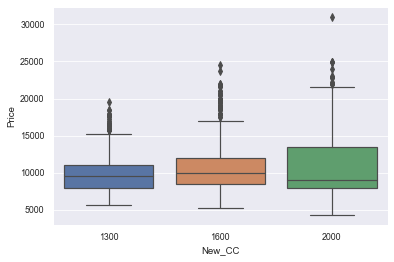

In [39]:
sns.boxplot(df['New_CC'], df['Price'])

plt.show()

## La cantidad de  puertas influyen en el Precio?

     * El tipo de carrocería se puede asignar según el número de puertas (pares, impares)
     * Se considera que puede haber una diferencia de precio según el tipo de carrocería.

In [40]:
list(set(df['Doors']))

[2, 3, 4, 5]

In [41]:
df.groupby('Doors').aggregate((np.mean, np.std))['Price']

,mean,std
Doors,,
2,7950.000000,NaN
3,10109.678815,3105.278106
4,9936.505376,3136.035106
5,11465.417695,3978.564926


### Reagrupar el número de puertas en números pares e impares
     

In [42]:
# Crear columna New_Doors

In [43]:
new_doors = []
for item in df["Doors"]:
    if item == 2 or item == 4 :
        item = 0 #Sedan
        new_doors.append(item)
    else:
        item = 1 #Wagon
        new_doors.append(item)

new_doors_df = pd.DataFrame(new_doors)
df['New_Doors'] = new_doors_df

df.tail(n=1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP,New_CC,New_Doors
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,110,1600,1


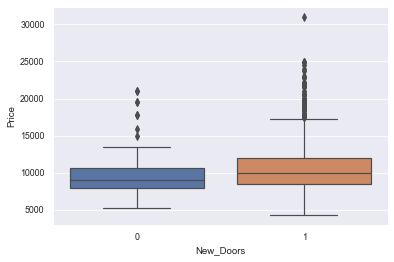

In [44]:
sns.boxplot(df['New_Doors'], df['Price'])
plt.show()

# Selección

## Seleccionar variables categóricas importantes mediante análisis ANOVA

### ANOVA y F-test

In [45]:
full_model = sms.OLS.from_formula("Price ~ C(Mfg_Year) + C(New_HP)+C(Fuel_Type)+Met_Color+C(Color)+Automatic+C(New_CC)+C(New_Doors)+C(Gears)+ Mfr_Guarantee+ BOVAG_Guarantee+ ABS+ Airbag_1+ Airbag_2+ Airco+ Automatic_airco+ Boardcomputer+ CD_Player+ Central_Lock+ Powered_Windows+Power_Steering+ Radio+ Mistlamps+ Sport_Model+ Backseat_Divider+ Metallic_Rim+ Radio_cassette+ Parking_Assistant+ Tow_Bar", data=df) 
full_result = full_model.fit()
cat_vars = sms.stats.anova_lm(full_result, typ=2).sort_values('PR(>F)', ascending=True)
cat_vars

,sum_sq,df,F,PR(>F)
C(Mfg_Year),2.550224e+09,6.0,312.691396,4.189638e-223
C(New_HP),1.571736e+08,2.0,57.814739,1.876788e-24
C(New_CC),1.511805e+08,2.0,55.610237,1.351937e-23
C(Fuel_Type),8.935443e+07,2.0,32.868126,1.536810e-14
Automatic_airco,8.240034e+07,1.0,60.620265,1.764525e-14
Automatic,2.916169e+07,1.0,21.453663,4.116258e-06
Mfr_Guarantee,2.280813e+07,1.0,16.779482,4.547324e-05
BOVAG_Guarantee,1.708368e+07,1.0,12.568120,4.110412e-04
C(New_Doors),1.062655e+07,1.0,7.817740,5.275359e-03
Airco,7.306368e+06,1.0,5.375147,2.063191e-02


#### Con base en el valor PR> F, los valores de 1% o menos se clasifican y seleccionan como una variable de categoría a considerar.


In [46]:
high_potent_cat_var = list(cat_vars.index)[:11]
high_potent_cat_var

['C(Mfg_Year)',
 'C(New_HP)',
 'C(New_CC)',
 'C(Fuel_Type)',
 'Automatic_airco',
 'Automatic',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'C(New_Doors)',
 'Airco',
 'C(Color)']

## Determinación de variables candidatas para hacer modelos de regresión

### Variable continua: seleccione 3 variables con alto coeficiente de correlación

##### 'Age_08_04', 'KM', "Weight" 

### Variable de categoría: se seleccionan 11 tipos según los resultados de ANOVA
##### 'Mfg_Year', 'New_HP', New_CC', 'Fuel_Type', 'Automatic_airco', 'Automatic', "Mfr_Guarantee", "BOVAG_Guarantee", 'New_Doors", "Airco", "Color '

### Iteración OLS para una selección de modelo óptimo, como la eliminación por pasos y hacia atrás (método codicioso)

* Base para juzgar el modelo óptimo
     * Comprobar si el valor P es 1% o menor
     * Si el valor de R cuadrado es relativamente alto ... (¡A medida que aumenta el número de variables, el valor de R cuadrado aumenta, por lo que la comparación con otros valores estadísticos es esencial!)
     * Comprobar el punto donde el valor de R cuadrado disminuye
     * Comprobar que el valor de Log-Likelihood tenga un valor relativamente grande
     * Comprobar que los valores AIC y BIC sean relativamente pequeños
     * Comprobar que el número de condición no sea grande (es necesario comprobar la multicolinealidad)
     * Comprobar la normalidad con Prob (Omnibus), Prob (JB)!

In [47]:
model_7 = sms.OLS.from_formula('Price ~ C(Mfg_Year) + KM + Weight+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee + Airco', data=df)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     707.7
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:09:06   Log-Likelihood:                -8578.3
No. Observations:                1019   AIC:                         1.719e+04
Df Residuals:                    1004   BIC:                         1.726e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1524.0363    

#### Este modelo tiene el problema de que los residuos no muestran normalidad y el número de condición es demasiado alto. El modelo demuestra que hay valores muy dispersos y eso ocurre porla posibidad de la multicolinearidad de algunas variables. 


# Modelado (diagnóstico y mejora del modelo de regresión

### Comprobación de multicolinealidad mediante VIF (factor de inflación de la varianza)

####  VIF (factor de inflación de la varianza) indica el rendimiento de la regresión lineal de una variable independiente a otra variable independiente, y se puede interpretar que tiene multicolinealidad a medida que aumenta el valor de VIF.

In [48]:
### El modelo anterior tiene el problema de que los residuos no muestran normalidad 
# y el número de condición es demasiado alto. 

In [49]:
def vif_check(var):
    dfX = df[var]
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
    vif['features'] = dfX.columns
    return vif

* Comprobar si el valor de VIF es mayor que 10

> La multicolinealidad no es un problema excepto cuando Age_08_04, KM y Weight se usan juntos en el modelo

In [50]:
var_1 = ['Age_08_04', 'KM','Weight']
vif_check(var_1)

,VIF Factor,features
0,12.112462,Age_08_04
1,5.812175,KM
2,8.868779,Weight


In [51]:
var_2 = ['Age_08_04', 'KM']
vif_check(var_2)

,VIF Factor,features
0,5.72108,Age_08_04
1,5.72108,KM


In [52]:
var_3 = ['KM', 'Weight']
vif_check(var_3)

,VIF Factor,features
0,4.188991,KM
1,4.188991,Weight


In [53]:
var_4 = ["Age_08_04", "Weight"]
vif_check(var_4)

,VIF Factor,features
0,8.729776,Age_08_04
1,8.729776,Weight


Mientra mas altos sea el valor del VIF Factor significa que existe una multiconelialidad de las variavles. 

#### Redefinir la relación entre los datos para ajustar el modelo lineal a través del proceso de preprocesamiento de Scaling

In [54]:
model_7 = sms.OLS.from_formula('Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee + Airco', data=df)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     707.7
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:09:07   Log-Likelihood:                -8578.3
No. Observations:                1019   AIC:                         1.719e+04
Df Residuals:                    1004   BIC:                         1.726e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7634.6774    

Comprobe que el número de condición se reduce a 22,4. El modelo es mas preciso que el anterior porque la condicion es mas pequeña.

### Prueba de normalidad de residuos
* Si los datos satisfacen los supuestos del modelo utilizado en el análisis de regresión, los residuos deben seguir una distribución normal.

* Comprobar si los residuos siguen una distribución normal con Q-Q Plot y prueba de normalidad

> ** Como resultado del uso de QQ Plot y Omnibus Normality Test, se confirma que los residuos no siguen una distribución normal **

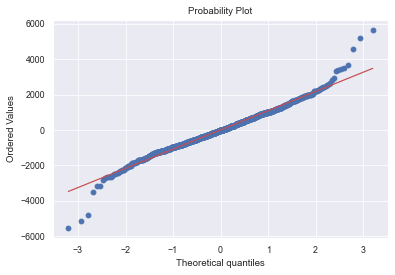

In [55]:
sp.stats.probplot(result_7.resid, plot=plt)
plt.show()

La grafica muestra que debo seguir ajustando el modelo porque los resultados no siguen una distribucion normal

In [56]:
import statsmodels

test = statsmodels.stats.stattools.omni_normtest(result_7.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 67.042
P-value     :  0.000


## Verificar la relación entre cada variable y la variable dependiente con  Partregress Plot

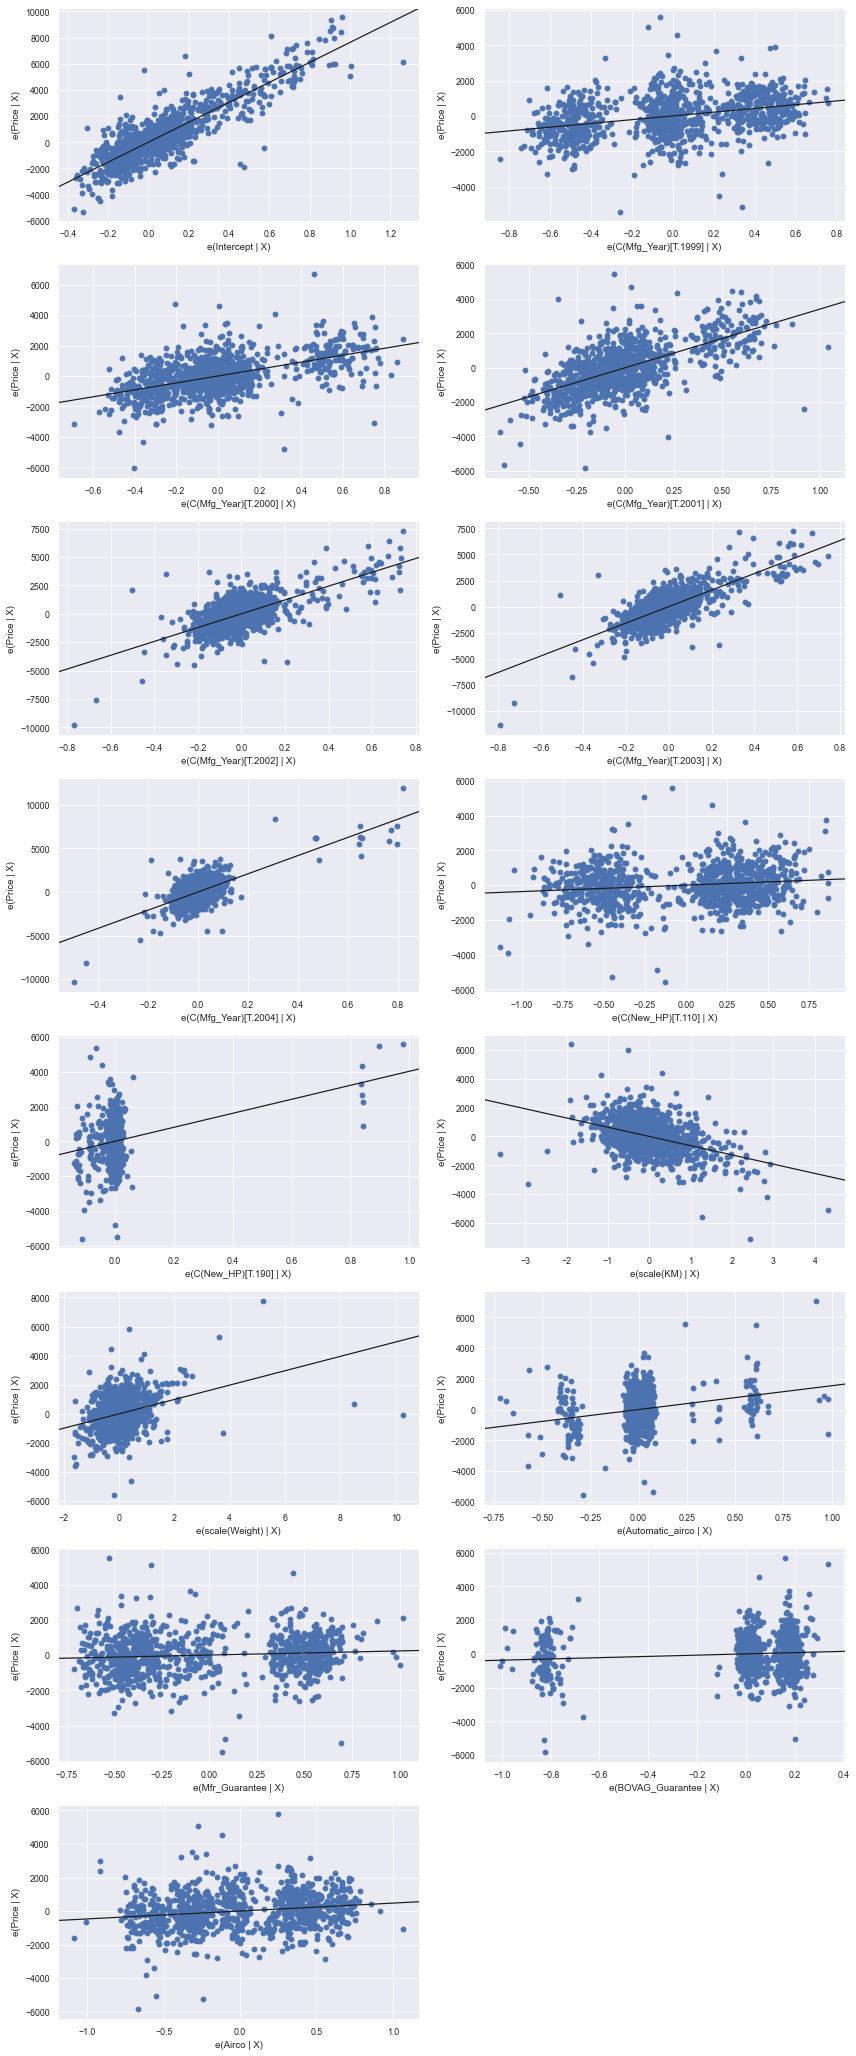

In [57]:
fig = plt.figure(figsize=(12,30))
sms.graphics.plot_partregress_grid(result_7, fig=fig)
fig.suptitle("")
plt.show()

## Eliminar valores atípicos

* En la prueba de normalidad residual, los residuos no siguen una distribución normal. En consecuencia, después de eliminar los datos que se consideran valores atípicos, se vuelve a confirmar si los residuos del modelo de análisis de regresión siguen la distribución normal.

1) Apalancamiento
     * Verificar el efecto de cada muestra de datos individual en el resultado del análisis de regresión

hat.sum()= 14.999999999999998


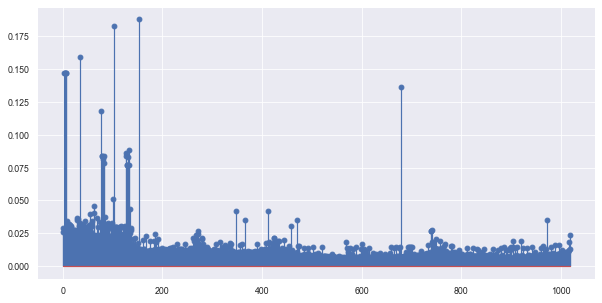

In [58]:
influence = result_7.get_influence()
hat = influence.hat_matrix_diag
print ('hat.sum()=', hat.sum())

plt.figure(figsize=(10, 5))
plt.stem(hat)
plt.show()

2) Verificar los datos con grandes residuos (valores atípicos)

    Verifique varios valores mayores de 2-4

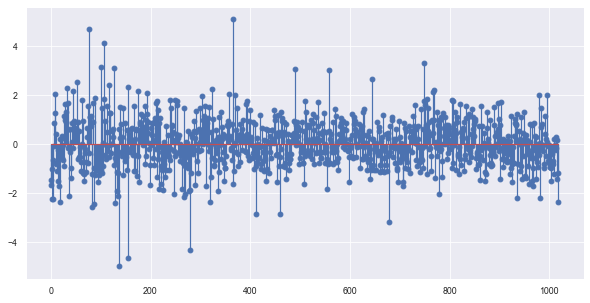

In [59]:
plt.figure(figsize=(10, 5))
plt.stem(result_7.resid_pearson)
plt.show()

3) Visualización para ver el apalancamiento y los residuos de los datos al mismo tiempo
* eje x: cuadrado residual, eje y: valor de apalancamiento

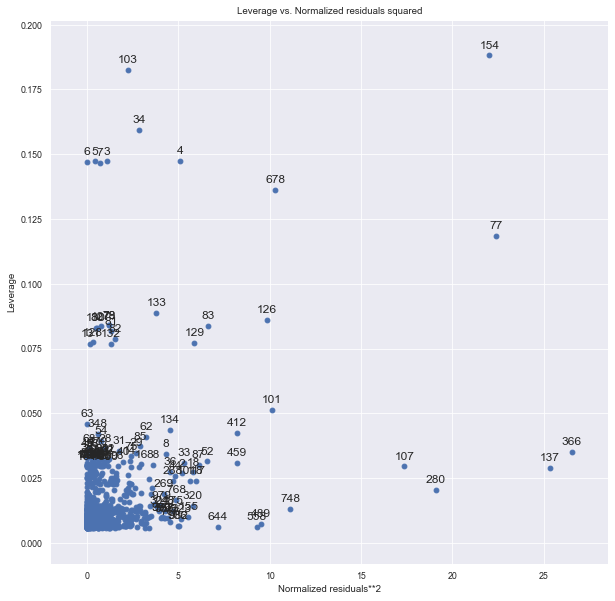

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
fig = plot_leverage_resid2(result_7, ax = ax)


4) Trazando la Cook's Distance 

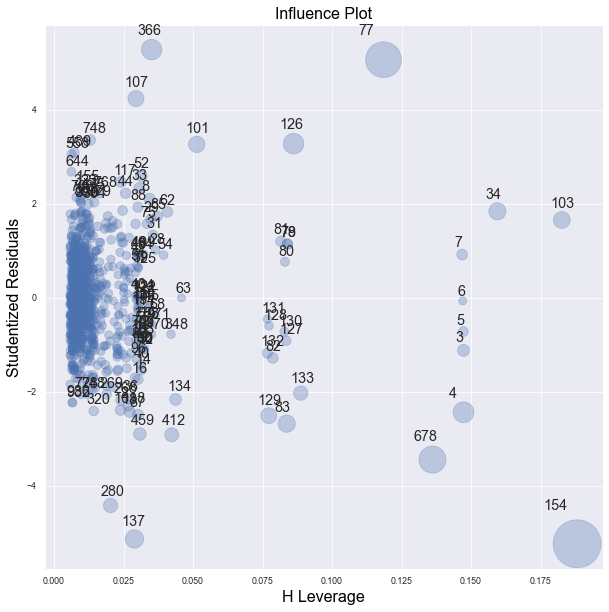

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
sms.graphics.influence_plot(result_7, plot_alpha=0.3, ax = ax)
plt.show()

5) Eliminar valores atípicos utilizando Fox Recommendation

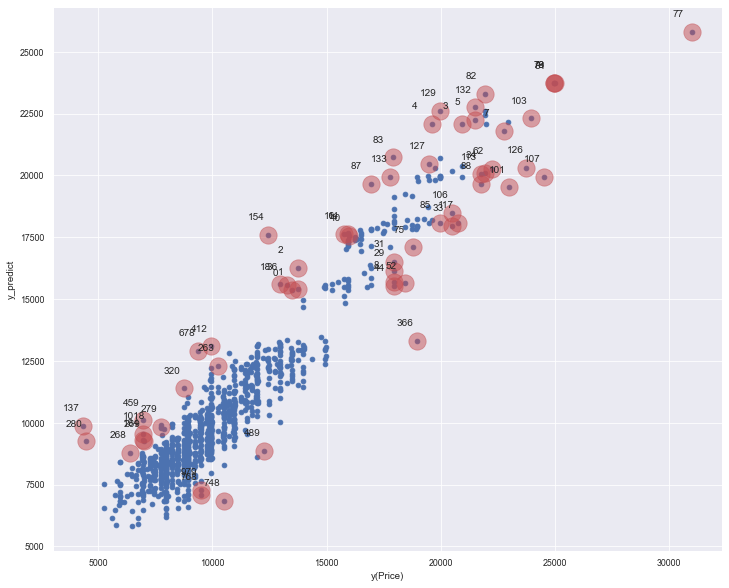

[0, 1, 2, 3, 4, 5, 7, 8, 14, 16, 18, 29, 31, 33, 34, 36, 40, 44, 52, 62, 75, 77, 78, 79, 81, 82, 83, 85, 87, 88, 101, 103, 106, 107, 113, 117, 126, 127, 129, 132, 133, 134, 137, 154, 263, 268, 269, 279, 280, 320, 366, 412, 459, 489, 678, 748, 768, 979, 1018]

Número de valores atípicos(Fox Recommendation):  59


In [62]:
from statsmodels.graphics import utils
import patsy

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df['Price']) - 9)
idx = np.where(cooks_d2 > fox_cr)[0]

outliers = list(idx)

# Fox Recommendation 
eq = 'Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) +\
Automatic_airco+ Mfr_Guarantee + BOVAG_Guarantee + Airco'
eq_y,eq_X = patsy.dmatrices(eq, df, return_type = 'dataframe')

eq_model = sms.OLS(eq_y, eq_X)
eq_result = eq_model.fit()
eq_y_new = eq_result.predict(eq_X)
influence_2 = eq_result.get_influence()

cooks_d2_2, pvals_2 = influence_2.cooks_distance
fox_cr_2 = 4 / (len(eq_y) - 9)
idx2 = np.where(cooks_d2_2 > fox_cr_2)[0]

fig, ax = plt.subplots(figsize=(12, 10))

plt.xlabel('y(Price)')
plt.ylabel('y_predict')
plt.scatter(eq_y, eq_y_new)
plt.scatter(eq_y.values[idx], eq_y_new.values[idx], s=300, c="r", alpha=0.5)

from statsmodels.graphics import utils
utils.annotate_axes(range(len(idx)), idx, list(zip(eq_y.values[idx].flatten(), eq_y_new.values[idx].flatten())),
                    [(-20, 15)] * len(idx), size="medium", ax=ax)
plt.show()

# OUTLIERS
outliers.sort()
print(outliers)
print()
print('Número de valores atípicos(Fox Recommendation): ', len(outliers))

In [63]:
# Eliminar valores atípicos

new_df = df.drop(df.index[outliers])

renew_df = new_df.reset_index(drop=True)
renew_df.tail(n=3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP,New_CC,New_Doors
957,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,90,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,100,1300,1
958,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,90,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,100,1300,1
959,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,90,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,100,1300,1


6) Análisis de regresión por método OLS aplicando datos extraídos de valores atípicos

In [64]:
original_model = sms.OLS.from_formula('Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee + Airco', data=renew_df)
original_result = original_model.fit()
print(original_result.summary())

original_params = original_result.params

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     713.6
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:09:14   Log-Likelihood:                -7888.3
No. Observations:                 960   AIC:                         1.581e+04
Df Residuals:                     945   BIC:                         1.588e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7674.1524    

Chi^2       :  4.286
P-value     :  0.117


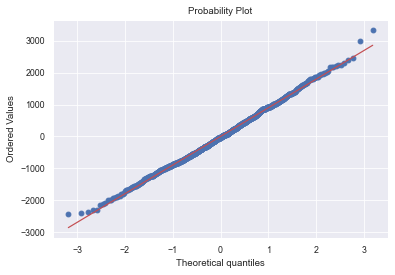

In [65]:
test = statsmodels.stats.stattools.omni_normtest(original_result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

sp.stats.probplot(original_result.resid, plot=plt)
plt.show()

El valor de Prob (Omnibus) aumentó a 0 -> 0.117. 
Acepte la hipótesis nula de que los residuos siguen una distribución normal.

## Conversión de variables

In [66]:
modified_model = sms.OLS.from_formula('np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee +Airco', data=renew_df)
modified_result = modified_model.fit()
print(modified_result.summary())

modified_params = modified_result.params

                            OLS Regression Results                            
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     613.0
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:09:14   Log-Likelihood:                -2822.6
No. Observations:                 960   AIC:                             5673.
Df Residuals:                     946   BIC:                             5741.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                88.56

In [67]:
final_model = sms.OLS.from_formula('np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
                              + Mfr_Guarantee + BOVAG_Guarantee+Airco', data=renew_df)
final_result = final_model.fit()
    
f_f = 'np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
+ Mfr_Guarantee + BOVAG_Guarantee+Airco'
f_dfy,f_dfX = patsy.dmatrices(f_f, renew_df, return_type = 'dataframe')
f_y_predict = modified_params * f_dfX

f_y_predict['y_hat'] = (f_y_predict.sum(axis=1)) ** 2

final_RMSE = mean_squared_error((renew_df["Price"]), f_y_predict['y_hat'])**0.5  
final_RMSE

899.1196491472168

## Regularización

* El método de regresión lineal regularizado es un método para evitar el sobreajuste al agregar una restricción al coeficiente de regresión lineal (weight).

In [68]:
#Lasso regularized
lasso_regularize = modified_model.fit_regularized(alpha=0.0001, L1_wt=0.5)
lasso_params = lasso_regularize.params
lasso_params

Intercept                88.595260
C(Mfg_Year)[T.1999]       6.143111
C(Mfg_Year)[T.2000]      12.362452
C(Mfg_Year)[T.2001]      17.420238
C(Mfg_Year)[T.2002]      28.136358
C(Mfg_Year)[T.2003]      32.053030
C(Mfg_Year)[T.2004]      39.393413
C(New_HP)[T.110]          1.464100
C(New_HP)[T.190]         12.519023
scale(np.sqrt(KM))       -3.011016
scale(np.log(Weight))     1.939697
Automatic_airco           5.048224
Mfr_Guarantee             1.874312
Airco                     2.422854
dtype: float64

In [69]:
#Ridge regularized
ridge_regularize = modified_model.fit_regularized(alpha=0.01, L1_wt=0)
ridge_params = ridge_regularize.params
ridge_params[:, np.newaxis]
index = pd.DataFrame(lasso_params.index)
ridge_df = pd.concat((index, pd.DataFrame(ridge_params)), axis=1)
ridge_params = ridge_df.T
ridge_params.columns = ridge_df.T.iloc[0]
ridge_params = ridge_params.iloc[1]

0.0001


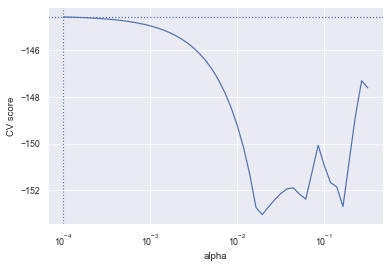

In [70]:
# hyper parameter optimization (2, simple ver.)
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(f_dfX, f_dfy)

print(lasso_cv.alpha_)

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()


0.13894954943731375


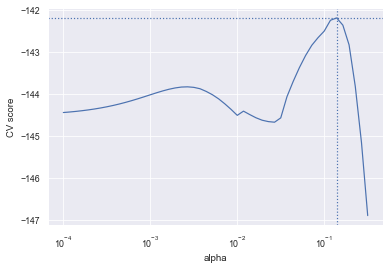

In [71]:
#elastic net regularized
elastic_regularize = modified_model.fit_regularized(alpha=0.138, L1_wt=1)
elastic_params = elastic_regularize.params
elastic_params

# hyper parameter optimization
from sklearn.linear_model import ElasticNetCV
alphas = np.logspace(-4, -.5, 50)
elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
elastic_cv.fit(f_dfX, f_dfy)

print(elastic_cv.alpha_)

scores = -elastic_cv.mse_path_.mean(axis=1)
plt.semilogx(elastic_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(elastic_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

## Validación cruzada

**Validación cruzada**
     : Utilizando el modelo de regresión separando los datos de train set y test set (usando RMSE)

Separación del conjunto de pruebas utilizando K-fold y cálculo de RMSE
* Separar los datos en conjuntos de train y test utilizando kfold proporcionado por el paquete scikitlearn
* Usando el paquete patsy, use la variable escalada tal como está (patsy.dmatrices ..)

In [72]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


def cross_validation(variable, param, k):

    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    sum_rsq = 0
    sum_rmse = 0
   
    for num, (train_index, test_index) in enumerate(cv.split(renew_df["Id"])):
    
        test_set = renew_df.iloc[(test_index)]
        train_set = renew_df.iloc[(train_index)]
    
        cv_model = sms.OLS.from_formula(variable, data=train_set)
        cv_result = cv_model.fit()
    
        f = variable
        dfy,dfX = patsy.dmatrices(f, test_set, return_type = 'dataframe')
        y_predict = param * dfX
        
        # Modelo de transformación variable
        if variable.split(' ')[0] == 'np.sqrt(Price)':
            
            # testset Precio predicho con los datos del conjunto de prueba
            y_predict['y_hat'] = (y_predict.sum(axis=1)) ** 2
            test_RMSE_num = mean_squared_error((test_set["Price"]), y_predict['y_hat'])**0.5   
            r_score_num = cv_result.rsquared
            print('='* 10, 'Score Board'+str(num+1), '='*10)
            print('mean price: ', test_set["Price"].mean())
            print('Score:', test_RMSE_num)
            print('R squared: ', r_score_num)
            print()
            
            sum_rsq += r_score_num
            sum_rmse += test_RMSE_num
            
        # Modelo sin transformación de variable
        
        else:
            # test set Precio valor predicho con datos del conjunto de prueba
            y_predict['y_hat'] = (y_predict.sum(axis=1))
            test_RMSE_num = mean_squared_error(test_set["Price"], y_predict['y_hat'])**0.5            
            r_score_num = cv_result.rsquared
            print('='* 10, 'Score Board'+str(num+1), '='*10)
            print('mean price: ', test_set["Price"].mean())
            print('Score:', test_RMSE_num)
            print('R squared: ', r_score_num)
            print()
    
            sum_rsq += r_score_num
            sum_rmse += test_RMSE_num
        
    print()
    print("*"*5, "Mean Score of a couple of tests", "*"*5)
    print("Mean R^2: ", sum_rsq/k)
    print("Mean RMSE: ", sum_rmse/k)
    print()
    
    print("Diferencia con el RMSE del modelo entrenado: ", round(final_RMSE - (sum_rmse/k), 3))

In [73]:
# Modelo existente (modelo sin transformación de variable)

variables_1 = 'Price ~ C(Mfg_Year) + scale(KM) + scale(Weight)+ C(New_HP) + Automatic_airco\
+ Mfr_Guarantee + BOVAG_Guarantee + Airco'

# Parámetros seleccionados del modelo existente

params_1 = original_params

# ----------------------------------------------------------------------------------------------

# # Modelo de transformación variable

variables_2 = "np.sqrt(Price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP)\
+ Automatic_airco + Mfr_Guarantee + BOVAG_Guarantee + Airco"

# Parámetros seleccionados por el modelo de transformación de variables

params_2 = modified_params

# Parámetro de Ridge Regularization del modelo de transformación de variables

params_3 = ridge_params

# Parámetro de lasso Regularization del modelo de transformación de variables

params_4 = lasso_params

# Parámetro de elastic net Regularization del modelo de transformación de variables

params_5 = elastic_params


In [74]:
# Determinación del modelo óptimo aplicando la función creada para medir varios puntajes usando RMSE

cross_validation(variables_1, params_1, 3)

========== Score Board1 ==========
mean price:  10478.85625
Score: 907.5213204842923
R squared:  0.9134435636877382

========== Score Board2 ==========
mean price:  10344.715625
Score: 868.6271268282849
R squared:  0.9116494029682238

========== Score Board3 ==========
mean price:  10318.03125
Score: 919.125001829449
R squared:  0.9175252718435091


***** Mean Score of a couple of tests *****
Mean R^2:  0.9142060794998237
Mean RMSE:  898.424483047342

Diferencia con el RMSE del modelo entrenado:  0.695


# Selección del modelo de regresión final


> ¡Seleccionado como modelo antes de la conversión de variables!

In [75]:
original_params

Intercept               7674.152441
C(Mfg_Year)[T.1999]     1094.978621
C(Mfg_Year)[T.2000]     2360.067729
C(Mfg_Year)[T.2001]     3517.729270
C(Mfg_Year)[T.2002]     6135.663358
C(Mfg_Year)[T.2003]     7427.604968
C(Mfg_Year)[T.2004]    10114.366508
C(New_HP)[T.110]         254.678194
C(New_HP)[T.190]        3762.601741
scale(KM)               -591.686582
scale(Weight)            423.929420
Automatic_airco         1522.255162
Mfr_Guarantee            308.964183
BOVAG_Guarantee          271.978952
Airco                    490.357545
dtype: float64

In [76]:
original_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     713.6
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:09:17   Log-Likelihood:                -7888.3
No. Observations:                 960   AIC:                         1.581e+04
Df Residuals:                     945   BIC:                         1.588e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7674.1524    112.967     67.933      0.000    7452.457    7895.848
C(Mfg_Year)[T.1999]  1094.9786     77.617     14.108      0.000     942.658    1247.299
C(Mfg_Year)[T.2000]  2360.0677     99.475     23.725      0.000    2164.850    2555.286
C(Mfg_Year)[T.2001]  3517.7293    111.288     31.609      0.000    3299.329    3736.129
C(Mfg_Year)[T.2002]  6135.6634    204.738     29.968      0.000    5733.870    6537.457
C(Mfg_Year)[T.2003]  7427.6050    198.292     37.458      0.000    7038.462    7816.748
C(Mfg_Year)[T.2004]  1.011e+04    489.532     20.661      0.000    9153.671    1.11e+04
C(New_HP)[T.110]      254.6782     66.503      3.830      0.000     124.168     385.188
C(New_HP)[T.190]     3762.6017    926.361      4.062      0.000    1944.640    5580.564
scale(KM)            -591.6866     39.003    -15.170      0.000    -668.230    -515.143
scale(Weight)         423.9294     39.671     10.686      0.000     346.076     501.782
Automatic_airco      1522.2552    186.410      8.166      0.000    1156.430    1888.080
Mfr_Guarantee         308.9642     63.364      4.876      0.000     184.613     433.315
BOVAG_Guarantee       271.9790     98.642      2.757      0.006      78.397     465.561
Airco                 490.3575     67.102      7.308      0.000     358.672     622.043
==============================================================================
Omnibus:                        4.286   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.323
Skew:                           0.163   Prob(JB):                        0.115
Kurtosis:                       2.957   Cond. No.                         54.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Usando el paquete patsy

f_ = variables_1
y_,X_ = patsy.dmatrices(f_, renew_df, return_type='dataframe')

In [78]:
# Calcule el precio predicho del automóvil multiplicando cada parámetro y variable obtenidos por la ecuación de regresión

y_predict_df = params_1 * X_

# El valor de y_predict es el precio previsto antes de la transformación de la variable (sqrt)
y_predict_df['y_predict'] = y_predict_df.sum(axis=1)

# Restaurar la variable convertida
# y_predict_df['y_hat'] = y_predict_df['y_predict'] **2
y_predict_df.tail(n=1019)



,Intercept,C(Mfg_Year)[T.1999],C(Mfg_Year)[T.2000],C(Mfg_Year)[T.2001],C(Mfg_Year)[T.2002],C(Mfg_Year)[T.2003],C(Mfg_Year)[T.2004],C(New_HP)[T.110],C(New_HP)[T.190],scale(KM),scale(Weight),Automatic_airco,Mfr_Guarantee,BOVAG_Guarantee,Airco,y_predict
0,7674.152441,0.0,0.0,0.0,6135.663358,0.0,0.0,0.000000,3762.601741,817.829922,1325.160878,1522.255162,0.000000,271.978952,490.357545,22000.000000
1,7674.152441,0.0,0.0,0.0,6135.663358,0.0,0.0,254.678194,0.000000,78.373405,433.000040,0.000000,308.964183,271.978952,490.357545,15647.168118
2,7674.152441,0.0,0.0,0.0,6135.663358,0.0,0.0,254.678194,0.000000,24.867356,433.000040,0.000000,308.964183,271.978952,490.357545,15593.662069
3,7674.152441,0.0,0.0,0.0,6135.663358,0.0,0.0,254.678194,0.000000,409.913159,1157.880721,1522.255162,0.000000,271.978952,490.357545,17916.879533
4,7674.152441,0.0,0.0,0.0,6135.663358,0.0,0.0,254.678194,0.000000,208.207835,600.280197,1522.255162,0.000000,271.978952,490.357545,17157.573685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,7674.152441,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,570.463725,-737.961060,0.000000,308.964183,271.978952,0.000000,8087.598241
956,7674.152441,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,651.508937,-236.120589,0.000000,308.964183,271.978952,0.000000,8670.483925
957,7674.152441,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,788.572600,-459.160798,0.000000,308.964183,271.978952,490.357545,9074.864923
958,7674.152441,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,845.758102,-570.680903,0.000000,0.000000,271.978952,0.000000,8221.208592


In [79]:
y_predict_df['y_predict']

0      22000.000000
1      15647.168118
2      15593.662069
3      17916.879533
4      17157.573685
           ...     
955     8087.598241
956     8670.483925
957     9074.864923
958     8221.208592
959     8531.793679
Name: y_predict, Length: 960, dtype: float64

In [80]:
y_predict_df['y_predict'].mean()

10380.534375000008

# Comparando

In [81]:
answer_df = pd.read_csv('Data/test-answer.csv')
answer_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,White,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
3,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,Grey,0,2000,3,4,5,210,1245,0,1,3,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0
4,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,Grey,0,2000,3,4,5,210,1245,1,1,3,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0


In [82]:
#Preprocesamiento de datos HP

new_hp_3 = []
for item in list(answer_df['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_3.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_3.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_3.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_3.append(item)
    elif item > 190:
        item = 190
        new_hp_3.append(item)
        
answer_df["HP"] = pd.DataFrame(new_hp_3)

In [83]:
#Añadir nueva columna de datos (New_HP)

new_hp_df_2 =[]
for item in answer_df['HP']:
    if item <= 100:
        item = 100
        new_hp_df_2.append(item)
    else:
        new_hp_df_2.append(item)
        
new_hp_5 = pd.DataFrame(new_hp_df_2)
answer_df['New_HP'] = new_hp_5

answer_df.tail(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP
414,1436,TOYOTA Corolla 1.3 Linea Terra 4/5-Doors,8950,78,3,1998,24000,Petrol,90,1,Green,1,1300,5,4,5,85,1065,1,1,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,100
415,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8450,80,1,1998,23000,Petrol,90,0,Blue,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,100
416,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,90,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,100


In [84]:
ans_f = variables_1
ans_y,ans_X = patsy.dmatrices(ans_f, answer_df, return_type = 'dataframe')

ans_model = sms.OLS.from_formula(variables_1, data = answer_df)
ans_result = ans_model.fit()

y_hat = params_1 * ans_X

answer_df['y_hat'] = y_hat.sum(axis=1)
answer_df['y_hat^2'] = (y_hat.sum(axis=1)) ** 2
answer_df['sqrt_price'] = np.sqrt(answer_df['Price'])

answer_df.head(n=5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP,y_hat,y_hat^2,sqrt_price
0,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,100,15542.833228,2.415797e+08,118.110118
1,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,100,15440.451413,2.384075e+08,122.270193
2,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,White,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,100,15448.300711,2.386500e+08,113.798067
3,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,Grey,0,2000,3,4,5,210,1245,0,1,3,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,100,15472.456702,2.393969e+08,130.000000
4,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,Grey,0,2000,3,4,5,210,1245,1,1,3,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,100,16086.222080,2.587665e+08,136.381817


# Verifica la puntuación final


In [85]:
# Cuadrar el precio previsto para que se ajuste a la escala

Score = mean_squared_error(answer_df["Price"], answer_df['y_hat'])**0.5

mean_price = (answer_df['Price']).mean()
normalized_score = Score/mean_price

print("Mean price:", mean_price)
print("Score: ", round(Score, 3))
print("R-squared: ", ans_result.rsquared)
print("Normalized Score: ", normalized_score)

Mean price: 10712.414868105516
Score:  1158.54
R-squared:  0.9143642664185342
Normalized Score:  0.10814932963593188


In [86]:
# Raíz cuadrada del precio del conjunto de prueba original y compáralo con el valor predicho

#Score2 = mean_squared_error(answer_df["sqrt_price"], answer_df['y_hat'])**0.5

#mean_price2 = answer_df['sqrt_price'].mean()
#normalized_score2 = Score2 / mean_price2

#print("Mean Price: ", mean_price2)
#print("Score: ", round(Score2, 3))
#print("Normalized Score: ", normalized_score2)

#  Terminando  


In [87]:
## Cargar el archivo test.csv y aplique el modelo de regresión seleccionado

In [88]:
test_df = pd.read_csv('Data/test.csv')
test_df.tail(n=3)

,Id,Model,price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
414,1436,TOYOTA Corolla 1.3 Linea Terra 4/5-Doors,NaN,78,3,1998,24000,Petrol,86,1,Green,1,1300,5,4,5,85,1065,1,1,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
415,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,80,1,1998,23000,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
416,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [89]:
# Procesamiento previo para obtener los datos de HP recién categorizados utilizados en el modelo

In [90]:
new_hp_ = []
for item in list(test_df['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_.append(item)
    elif item > 190:
        item = 190
        new_hp_.append(item)
        
test_df["HP"] = pd.DataFrame(new_hp_)


In [91]:
#Añadir nueva columna de datos (New_HP)

new_hp_df =[]
for item in df['HP']:
    if item <= 100:
        item = 100
        new_hp_df.append(item)
    else:
        new_hp_df.append(item)
        
new_hp = pd.DataFrame(new_hp_df)
test_df['New_HP'] = new_hp

test_df.tail(n=3)

,Id,Model,price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,New_HP
414,1436,TOYOTA Corolla 1.3 Linea Terra 4/5-Doors,NaN,78,3,1998,24000,Petrol,90,1,Green,1,1300,5,4,5,85,1065,1,1,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,110
415,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,80,1,1998,23000,Petrol,90,0,Blue,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,100
416,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,NaN,72,9,1998,19000,Petrol,90,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,100


In [92]:
# En el archivo test.csv, todas las columnas de Precio son valores NaN. Ingrese 1 arbitrariamente
test_df['price'] = 1

# Predicción de precios aplicando modelo de regresión
f2 = 'np.sqrt(price) ~ C(Mfg_Year) + scale(np.sqrt(KM)) + scale(np.log(Weight))+ C(New_HP) + Automatic_airco\
+ Mfr_Guarantee + BOVAG_Guarantee + Airco'
y_test, X_test = patsy.dmatrices(f2, test_df, return_type='dataframe')
y_hat_0 = X_test * modified_params
y_hat = pd.DataFrame(y_hat_0.sum(axis=1))

predictions = pd.concat((test_df['Model'], y_hat**2),axis=1)

# Deje solo las columnas Id y y_hat como respuestas para el envío
predictions.columns=['Model', 'Answers']

# Guardar como archivo CSV
predictions.to_csv('Prediccion bot.csv', encoding='utf-8', mode='a', header=False, index=False)

In [93]:
print(predictions.to_csv)

<bound method NDFrame.to_csv of                                                  Model       Answers
0        TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  15374.015447
1        TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  15224.794115
2          TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  15118.355294
3        TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18547.948770
4        TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  19421.911700
5          TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  19891.876456
6          TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  17731.374826
7    TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...  21054.613136
8    TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  18037.924583
9               TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors  16705.081499
10      TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors  17706.179039
11      TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors  17176.028387
12   TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...  15948.128649
13

In [94]:
w = pd.read_csv('Prediccion bot.csv')

In [95]:
w.head().T

,0,1,2,3,4
TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors
15374.015446546475,15224.794115,15118.355294,18547.94877,19421.9117,19891.876456


In [96]:
w.mean()

15374.015446546475    10657.141799
dtype: float64